<a href="https://colab.research.google.com/github/dSudario9/Modelo-Classifica-o-/blob/main/ML_Classifica%C3%A7%C3%A3o_Coronarias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CENARIO **

Você foi convocado pelo hospital da regional para desenvolver
um sistema inteligente que, ao fornecer estes atributos, seu
modelo mostra se o paciente tem ou não doenças coronárias.
Dependendo do resultado do seu modelo, o paciente é
encaminhado mais rapidamente para um especialista.
Você deve então criar um modelo de Machine Learning com
hiperparâmetros otimizados para o F1 Score (Uma métrica para
problemas de classificação).
Lembrando que ao longo da sua análise, introdução, EDA,
transformações e modelagem, é importante ressaltar a ideia por
trás da sua ação. Fazendo isso, enriquece ainda mais seu projeto
e garante um entendimento melhor do leitor.

**ML Classificação doenças coronárias**

In [2]:
# Importa das Bibliotecas Basicas e plot de graficos. 
import pandas as pd
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt

# Quero que meu quadro de dados mostre apenas duas casas decimais para o número, então mudo o formato de exibição:
#pd.options.display.float_format = "{:,.2f}".format

EDA 

In [7]:
df = pd.read_csv("/content/drive/MyDrive/colab_data/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
# Estatistica basica 
print(df.shape)
df.describe()

(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Mostrando os tipos de dados do Dataset

In [9]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

Verificando  se há algum valor ausente:

In [10]:
df.isna().sum()

#Conforme mostra o Output não há valores ausentes. 

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

**Agora vamos  criar uma matriz de correlação para ver quais recursos têm mais efeito no valor alvo:**

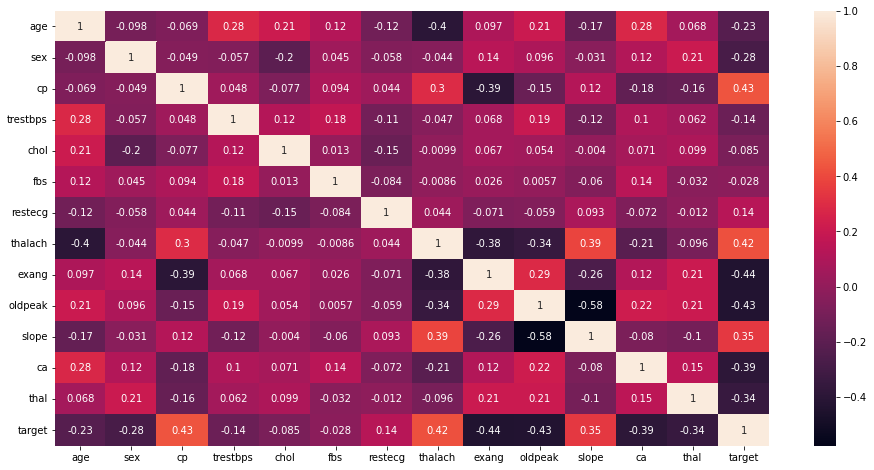

In [12]:
import seaborn as sns
plt.figure(figsize = (16, 8))

correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot = True)
plt.show()

Parece que "cp", "thalach", "slope" e "restepg" têm mais correlação com o valor alvo. mas, como vemos na matriz, "thalach" e "declive" têm uma correlação considerável entre si, e vemos a mesma coisa para "cp" e "thalach", então provavelmente devemos ter cuidado com a multicolinearidade. (neste bloco de notas, usarei todos os recursos para prever o valor alvo)

**Agora vizualizar por meio do graficos de Pares. **

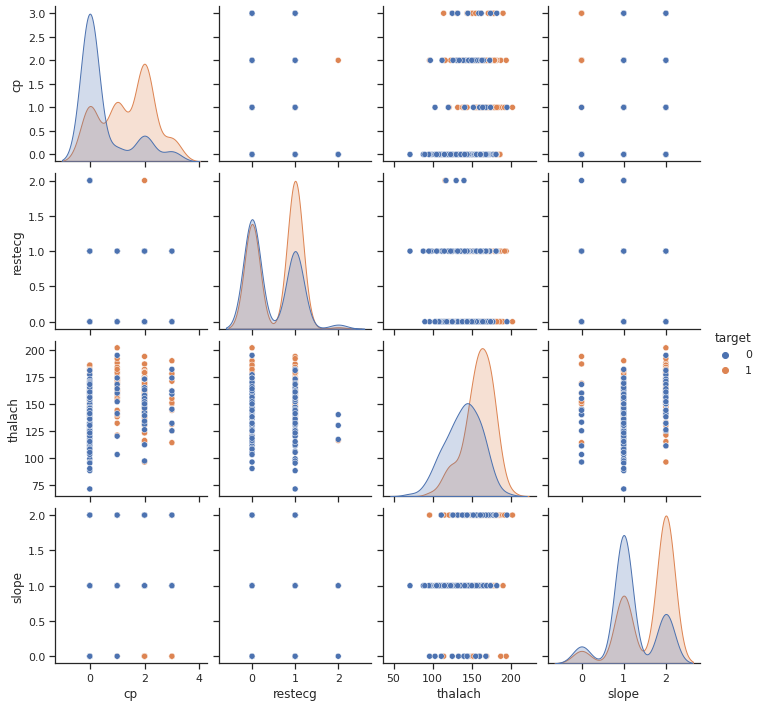

In [13]:
df_subset = df[["target","cp", "restecg", "thalach", "slope"]]

sns.set_theme(style="ticks")
sns.pairplot(df_subset, hue="target")

conforme demostra nos  gráficos de pares, os quatro recursos têm distribuições diferentes para cada classe de destino. 
 CP = Nivel de Dor (1- 4). 
 Restecg = Eletrocardiogramas em Repouso (0,1 ou 0,2).
 Thalach = Ritmo Cardíaco. 
 Slope = Tipo de Inclinação do segmento ST de pico do exercicio. 

***Agora podemos checar a distribuição de todas as variaveis do DataSet. ***

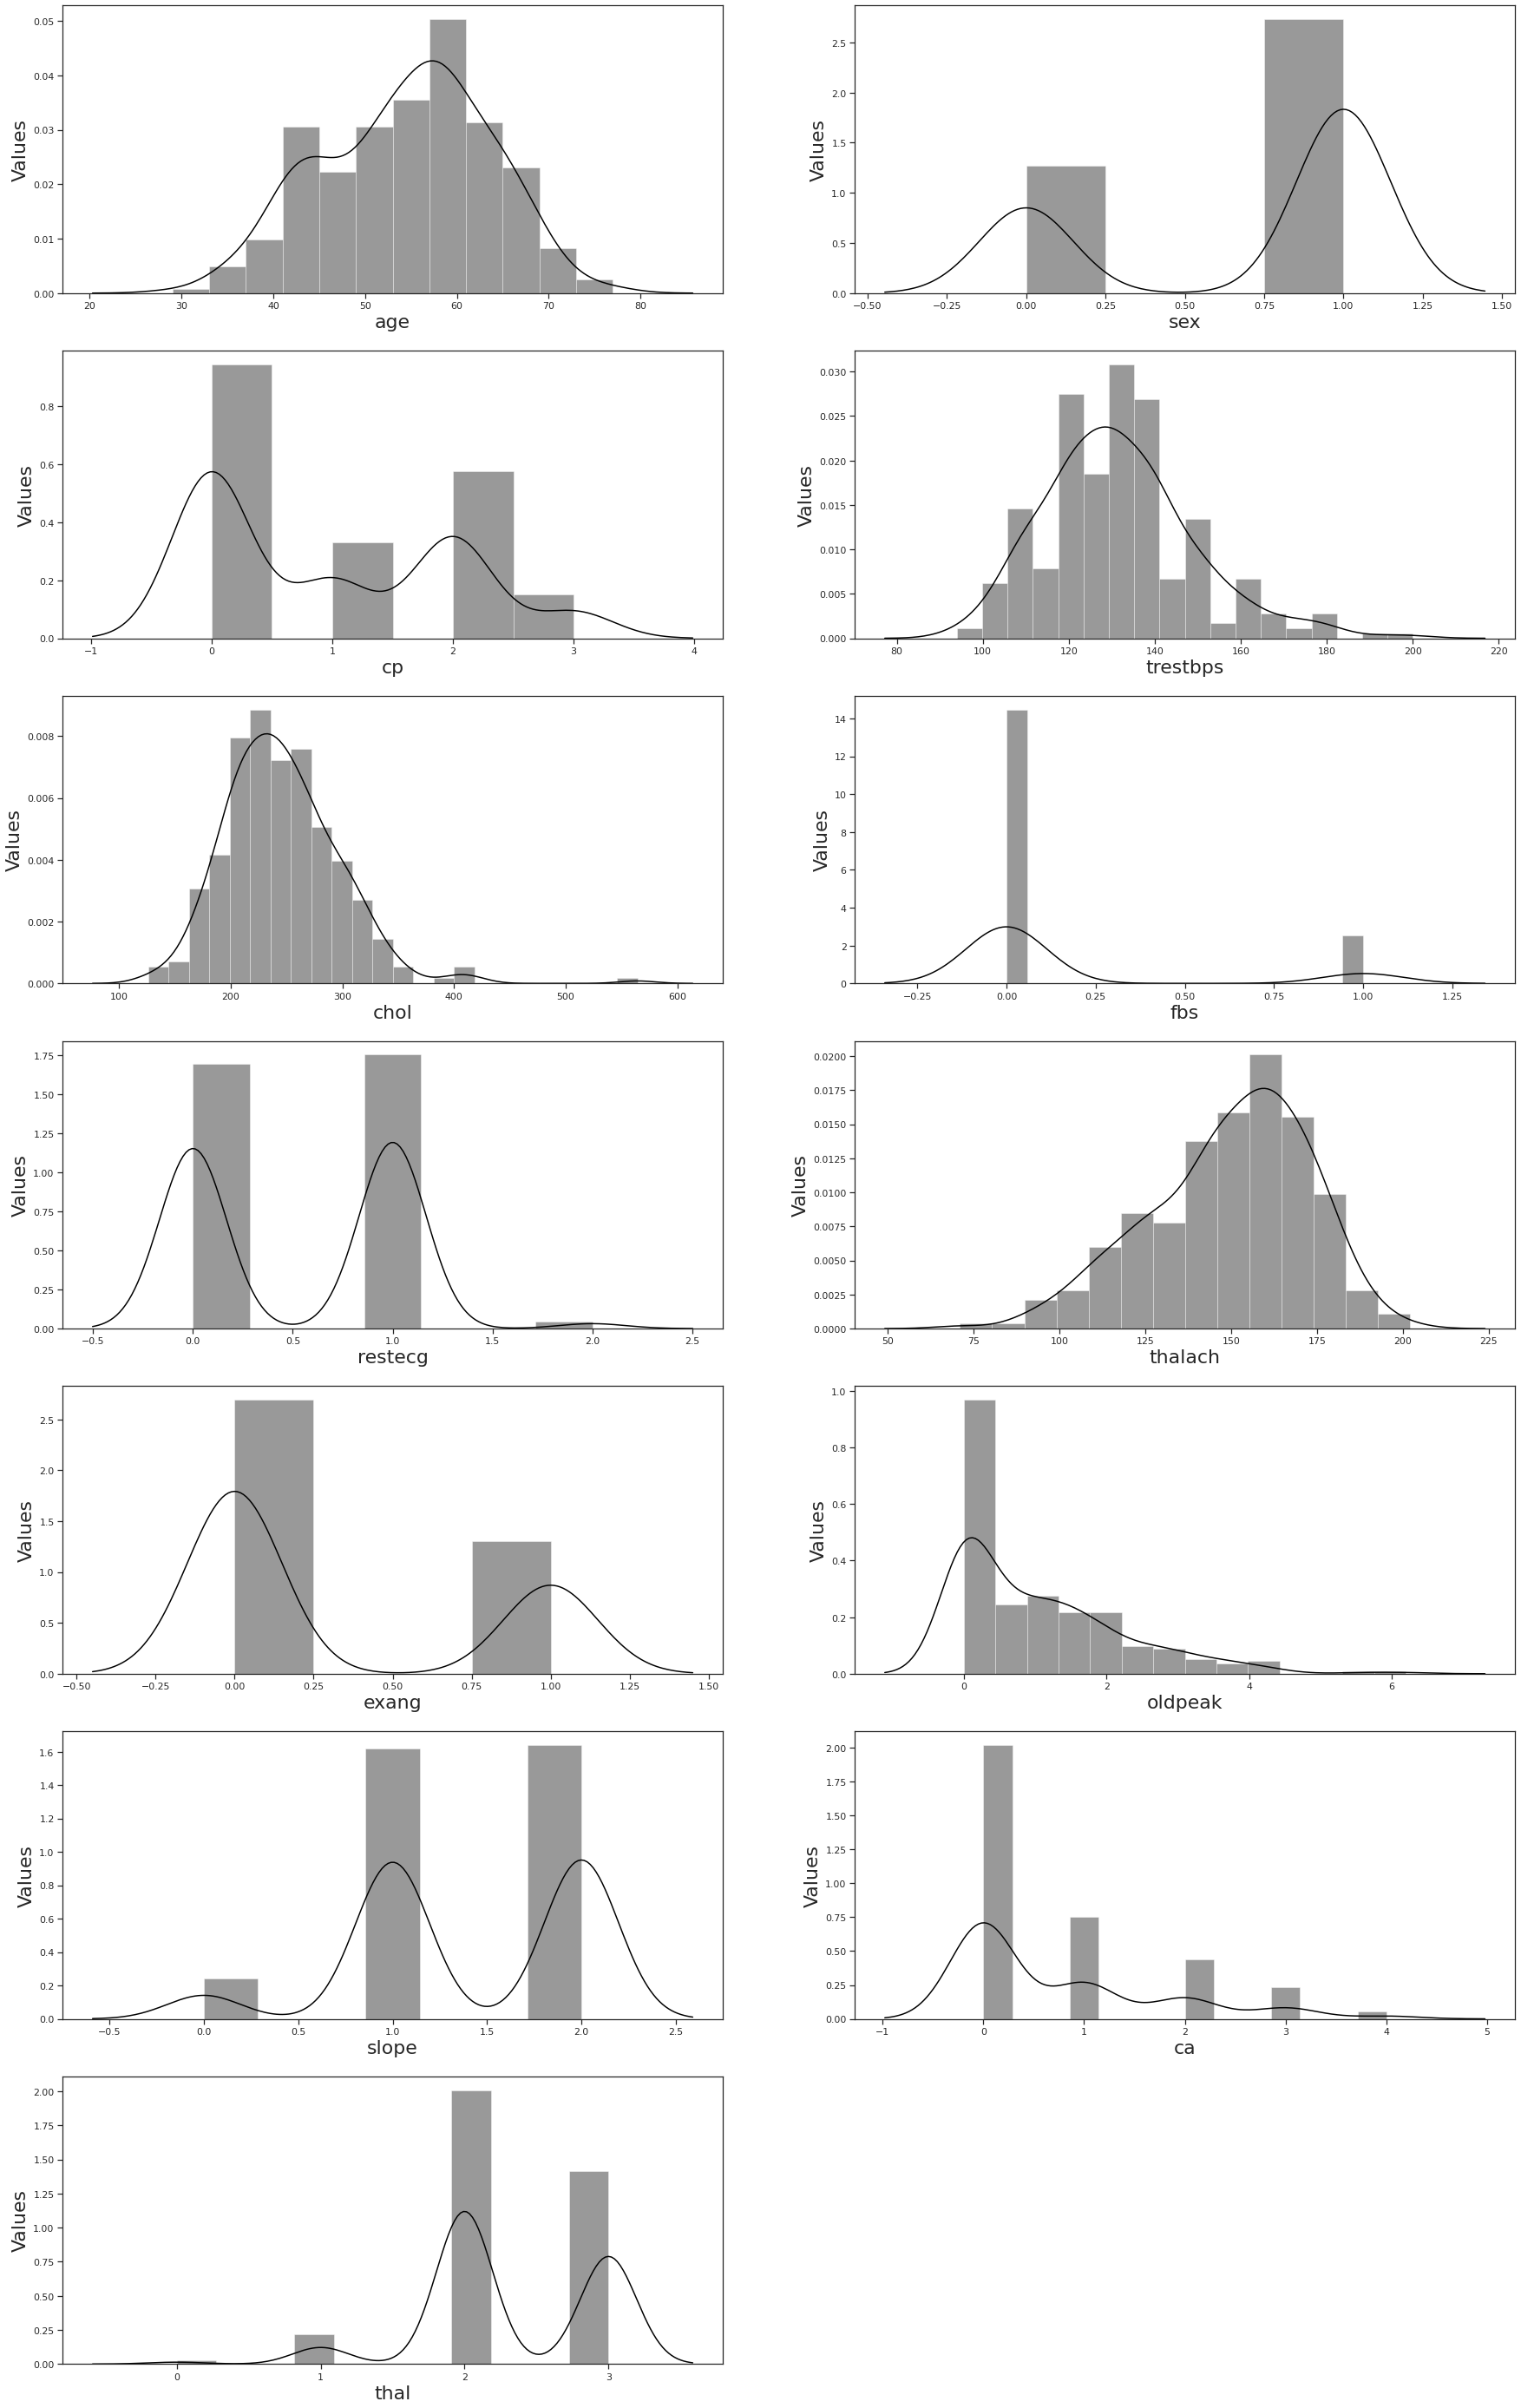

In [14]:
import warnings
warnings.filterwarnings('ignore')
 
plt.figure(figsize=(30,50))
plot_num=1

for column in df:
  if plot_num<14:
    ax=plt.subplot(7,2,plot_num)
    sns.distplot(df[column], color="black")
    plt.xlabel(column,fontsize=22)
    plt.ylabel('Values',fontsize=22)
  plot_num+=1
plt.show()

**MODELO DE CLASSIFICAÇÃO **




***Neste Ponto vamos iniciar o desenvolvimento  do Nosso modelo de Classificação o escolhido foi o KNN por obter um melhor resultado . ***



Vamos definir nossas variáveis ​​independentes e nossa variável de resposta:

In [15]:
X=df.drop('target',axis=1).values    
y=df['target'].values


Uma vez que usamos KNN e ele calcula a distância entre nossos pontos de dados. Para que o modelo funcione melhor, dimensionamos nossos dados usando a distribuição normal:

In [18]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

Scaler = preprocessing.StandardScaler().fit(X)
X = Scaler.transform(X)
X[0:3]

array([[ 0.9521966 ,  0.68100522,  1.97312292,  0.76395577, -0.25633371,
         2.394438  , -1.00583187,  0.01544279, -0.69663055,  1.08733806,
        -2.27457861, -0.71442887, -2.14887271],
       [-1.91531289,  0.68100522,  1.00257707, -0.09273778,  0.07219949,
        -0.41763453,  0.89896224,  1.63347147, -0.69663055,  2.12257273,
        -2.27457861, -0.71442887, -0.51292188],
       [-1.47415758, -1.46841752,  0.03203122, -0.09273778, -0.81677269,
        -0.41763453, -1.00583187,  0.97751389, -0.69663055,  0.31091206,
         0.97635214, -0.71442887, -0.51292188]])

**Nessa etapa dividimos  conjunto de dados em conjuntos de treinamento e teste:Onde será usado 20% dos dados para teste. 

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (242, 13) (242,)
Test set: (61, 13) (61,)


O KNeighborsClassifier possui o método predict, que recebe uma ou mais amostras para ele classificar e sua saída é um vetor com as classificações.

In [40]:
#import da Biblioteca KNeighborsClassifier

from sklearn.neighbors import KNeighborsClassifier

**Ajustando um modelo KNN com K = 4**

In [42]:
k = 4
knn = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

Predição para o conjunto de teste.

In [43]:
knn_yhat = knn.predict(X_test)
knn_yhat[0:5]

array([0, 0, 1, 1, 0])

**Avaliando o Modelo . **

In [44]:
from sklearn import metrics
KNN_Score = metrics.accuracy_score(y_test, knn_yhat)                                               
print("Train set Accuracy: ", metrics.accuracy_score(y_train, knn.predict(X_train)))
print("Test set Accuracy: ",KNN_Score )

Train set Accuracy:  0.859504132231405
Test set Accuracy:  0.8032786885245902


Como se observa, tivemos um bom resultado com acurácia. 

**Consideramos K igual a 4, mas esse é o melhor K? vamos descobrir:**

In [45]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    knn = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=knn.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.7704918 , 0.7704918 , 0.80327869, 0.80327869, 0.80327869,
       0.81967213, 0.83606557, 0.81967213, 0.81967213])

Vamos plotar o grafico para compararmos o resultado .

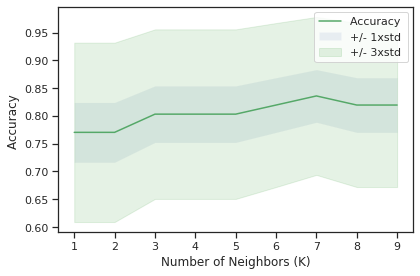

A melhor precisão para o método KNN foi com 0.8360655737704918 with k= 7


In [47]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

print( "A melhor precisão para o método KNN foi com", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

In [48]:
k = 7
knn = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [49]:
knn_yhat = knn.predict(X_test)
knn_yhat[0:5]

array([0, 0, 1, 1, 0])

**Avaliação KNN**

In [51]:
KNN_Score = metrics.accuracy_score(y_test, knn_yhat)                                               
print("Train set Accuracy: ", metrics.accuracy_score(y_train, knn.predict(X_train)))
print("Test set Accuracy: ",KNN_Score )

Train set Accuracy:  0.8512396694214877
Test set Accuracy:  0.8360655737704918


**Nesta avaliação do Modelo vimos que o melhor K foi o 7, assim trazendo resultados satisfartorios com acuracia de  0.8360655737704918 para test e de 0.8512396694214877 para train, dos demais modelos testados esse foi o melhor resultado por esse motivo foi o escolhido . (KNN)**